#### Baseline model for monitoring

In [20]:
import pandas as pd
import datetime
import requests
from tqdm import tqdm
from joblib import load, dump
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
files = [(file_name, path_to_download), (file_name, path_to_downlaod) ]
print("Downlaod files...")
for file,path in files:
    url = "url location of the date"
    response = requests.get(url, stream=True)
    save_path = f'{path}/{file}'
    with open(save_path, 'wb')as handle:
        for data in tqdm(response.inter_content(),
                         desc=f"{file}",
                         postfix=f"save to {save_path}",
                         total=int(response.headers["content-length"])):
            handle.write(data)

In [4]:
jan_data=pd.read_parquet("../data/green_tripdata_2023-01.parquet")

In [5]:
jan_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211,68211,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,2023-01-16 20:10:55.679523,2023-01-16 20:29:01.515767,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.373613,1.021933,0.726748
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.343820,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.508039,0.146465,1.212836


In [6]:
jan_data.shape

(68211, 20)

#### Target variable

In [7]:
jan_data["duration_min"] = jan_data.lpep_dropoff_datetime - jan_data.lpep_pickup_datetime
jan_data.duration_min = jan_data.duration_min.apply(lambda td:float(td.total_seconds())/60)

In [8]:
jan_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration_min
count,68211.000000,68211,68211,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000,68211.000000
mean,1.863028,2023-01-16 20:10:55.679523,2023-01-16 20:29:01.515767,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.373613,1.021933,0.726748,18.097271
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000,0.000000
25%,2.000000,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000,7.216667
50%,2.000000,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000,11.400000
75%,2.000000,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000,17.483333
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000,1439.883333
std,0.343820,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.508039,0.146465,1.212836,74.925631


#### filter outliers

In [26]:
jan_data = jan_data[(jan_data.duration_min >=0) & (jan_data.duration_min <=60)]
jan_data = jan_data[(jan_data.passenger_count>0) & (jan_data.passenger_count<=8)]

<Axes: >

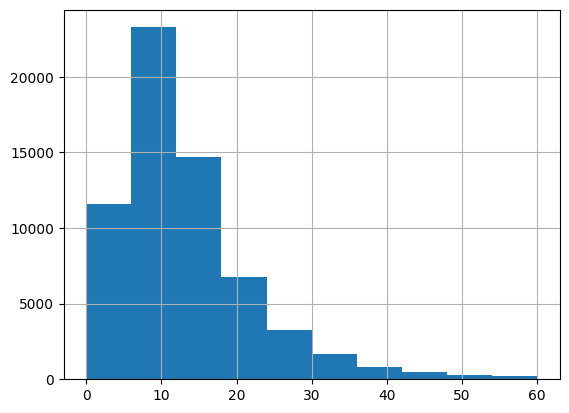

In [27]:
jan_data.duration_min.hist()

In [28]:
target = "duration_min"
numerical = ["passenger_count", "trip_distance","fare_amount", "total_amount"]
categorical = ["PULocationID","DOLocationID"]

In [40]:
train_data = jan_data[:40000]
val_data = jan_data[40000:]

In [41]:
model = LinearRegression()

In [42]:
model.fit(train_data[numerical + categorical], train_data[target])

LinearRegression()

In [44]:
train_preds = model.predict(train_data[numerical+categorical])
train_data.loc[:,"prediction"] = train_preds


val_preds = model.predict(val_data[numerical+categorical])
val_data = val_data.copy()
val_data.loc[:,"prediction"] = val_preds

In [45]:
print(mean_absolute_error(train_data.duration_min, train_data.prediction))
print(mean_absolute_error(val_data.duration_min, val_data.prediction))

3.563603845816335
3.608706475565711


#### Dump the model and Reference data
- In this case use validation data as ref 

In [48]:
with open('models/lin_reg.bin', 'wb') as f_out:
    dump(model, f_out)

In [49]:
val_data.to_parquet("../data/reference_data.parquet")